In [2]:
from pymongo import MongoClient
import pandas as pd
client = MongoClient("mongodb://localhost:27017/")
db = client["BIGDATA"]
collection = db["DATA"]  


In [22]:
list(collection.find())

[{'_id': ObjectId('67f76d169f460e1ff684d18c'),
  'FL_DATE': '2006-01-01',
  'DEP_DELAY': 5,
  'ARR_DELAY': 19,
  'AIR_TIME': 350,
  'DISTANCE': 2475,
  'DEP_TIME': 9.083333,
  'ARR_TIME': 12.483334},
 {'_id': ObjectId('67f76d169f460e1ff684d18d'),
  'FL_DATE': '2006-01-02',
  'DEP_DELAY': 167,
  'ARR_DELAY': 216,
  'AIR_TIME': 343,
  'DISTANCE': 2475,
  'DEP_TIME': 11.783334,
  'ARR_TIME': 15.766666},
 {'_id': ObjectId('67f76d169f460e1ff684d18e'),
  'FL_DATE': '2006-01-03',
  'DEP_DELAY': -7,
  'ARR_DELAY': -2,
  'AIR_TIME': 344,
  'DISTANCE': 2475,
  'DEP_TIME': 8.883333,
  'ARR_TIME': 12.133333},
 {'_id': ObjectId('67f76d169f460e1ff684d18f'),
  'FL_DATE': '2006-01-04',
  'DEP_DELAY': -5,
  'ARR_DELAY': -13,
  'AIR_TIME': 331,
  'DISTANCE': 2475,
  'DEP_TIME': 8.916667,
  'ARR_TIME': 11.95},
 {'_id': ObjectId('67f76d169f460e1ff684d190'),
  'FL_DATE': '2006-01-05',
  'DEP_DELAY': -3,
  'ARR_DELAY': -17,
  'AIR_TIME': 321,
  'DISTANCE': 2475,
  'DEP_TIME': 8.95,
  'ARR_TIME': 11.883333},

In [23]:
df=pd.DataFrame(collection.find())

In [24]:
print("Data shape:", df.shape)
print("\nColumn Summary:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())


Data shape: (1000000, 8)

Column Summary:
             DEP_DELAY       ARR_DELAY       AIR_TIME        DISTANCE  \
count  1000000.000000  1000000.000000  1000000.00000  1000000.000000   
mean         8.651135        6.400658      105.81399      741.258545   
std         31.167477       33.939187       69.33634      573.779372   
min      -1197.000000     -197.000000       -2.00000       30.000000   
25%         -4.000000      -10.000000       55.00000      325.000000   
50%          0.000000       -2.000000       87.00000      589.000000   
75%          8.000000       11.000000      136.00000      984.000000   
max       1379.000000     1374.000000      877.00000     4962.000000   

             DEP_TIME        ARR_TIME  
count  1000000.000000  1000000.000000  
mean        13.621958       15.134593  
std          4.737427        4.966053  
min          0.000000        0.000000  
25%          9.583333       11.283334  
50%         13.583333       15.383333  
75%         17.500000       

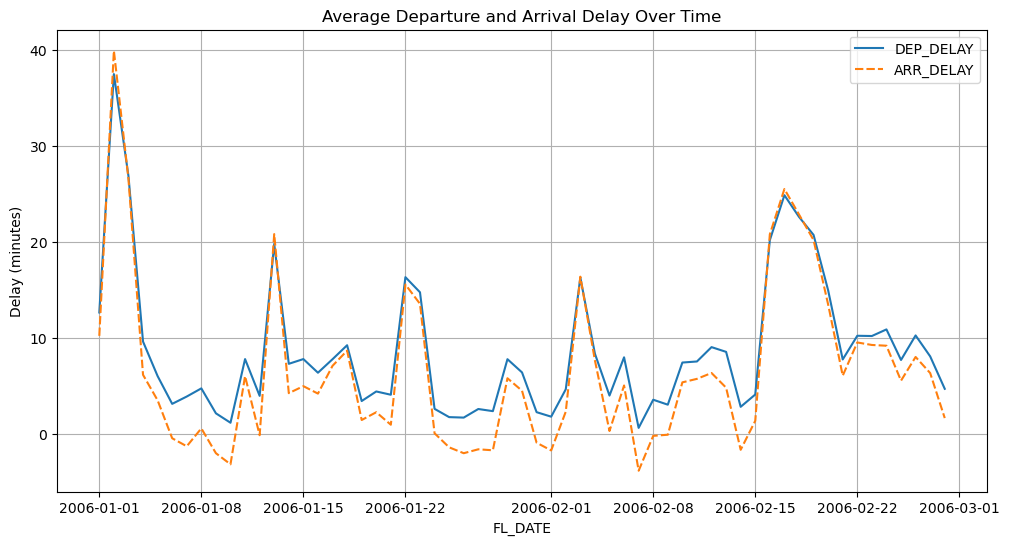

In [25]:
#Plot Average Delays Over Time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert FL_DATE to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Group by date and calculate average delays
daily_avg = df.groupby('FL_DATE')[['DEP_DELAY', 'ARR_DELAY']].mean()

# Plot the data
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_avg)
plt.title('Average Departure and Arrival Delay Over Time')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()


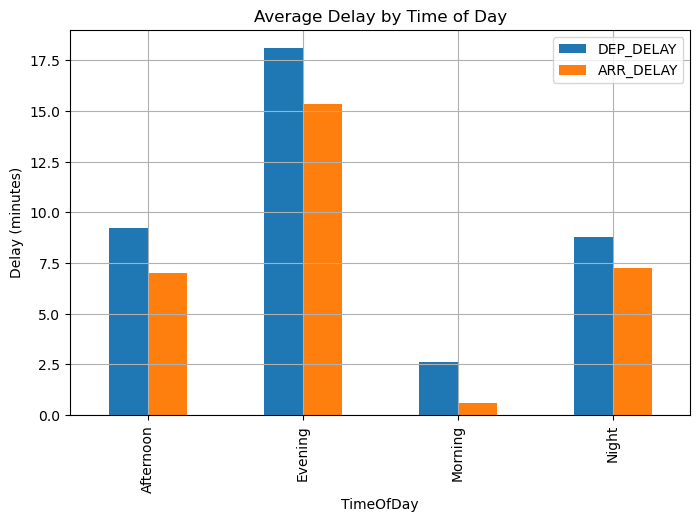

In [26]:
#Create Time of Day Column
def get_time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['DEP_HOUR'] = df['DEP_TIME'].astype(float).apply(lambda x: int(x))
df['TimeOfDay'] = df['DEP_HOUR'].apply(get_time_of_day)

# Analyze average delays by time of day
time_avg = df.groupby('TimeOfDay')[['DEP_DELAY', 'ARR_DELAY']].mean()

# Plot
time_avg.plot(kind='bar', figsize=(8,5), title='Average Delay by Time of Day')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()


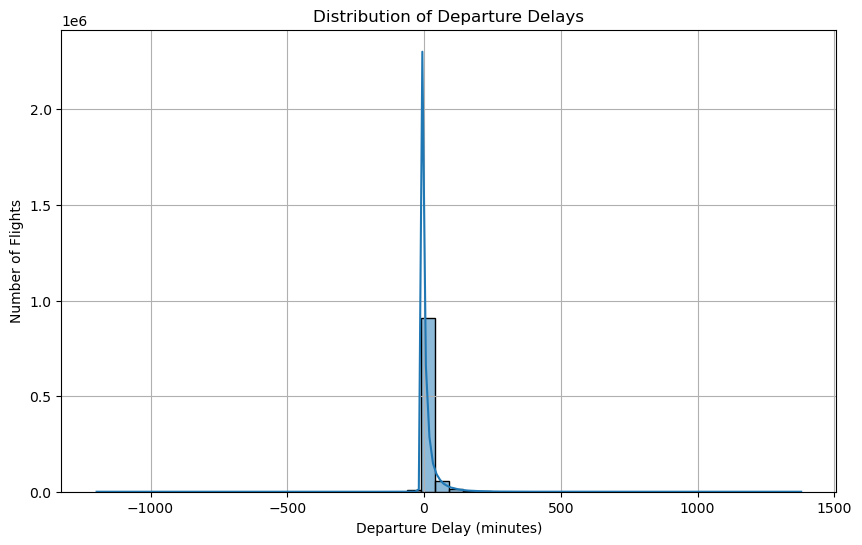

In [27]:
#Delay Buckets (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()


In [28]:
#Top 10 Worst Delayed Flights
top_delays = df.sort_values(by='DEP_DELAY', ascending=False).head(10)
print(top_delays[['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'DEP_TIME', 'ARR_TIME']])


          FL_DATE  DEP_DELAY  ARR_DELAY   DEP_TIME   ARR_TIME
614434 2006-02-22       1379       1374   8.516666  11.583333
516118 2006-01-05       1345       1329   8.583333  13.400000
600574 2006-02-10       1282       1275  11.466666  15.983334
613903 2006-02-11       1219       1226  10.716666  14.716666
594227 2006-02-17       1199       1171   7.100000  12.333333
386236 2006-01-07       1167       1167   8.500000  11.700000
385524 2006-01-19       1154       1146   7.400000  12.933333
978535 2006-02-06       1118       1108   1.633333   2.333333
397032 2006-01-28       1110       1114   8.616667  11.833333
48671  2006-01-09       1107       1093   8.850000  12.500000


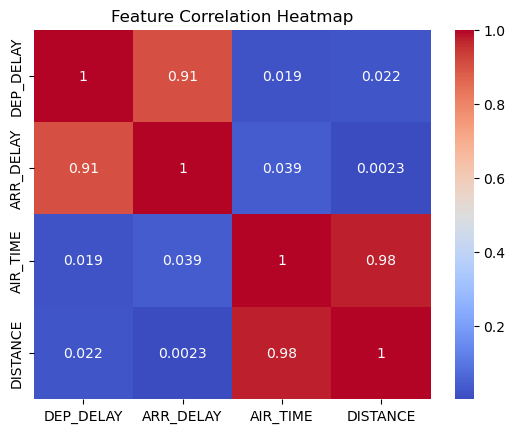

In [29]:
#Correlation Check
corr = df[['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [30]:
#Linear Regression Example
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['DEP_DELAY', 'AIR_TIME', 'DISTANCE']
target = 'ARR_DELAY'

X = df[features]
y = df[target]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))




RMSE: 13.750649637580556
R² Score: 0.8350142772417559


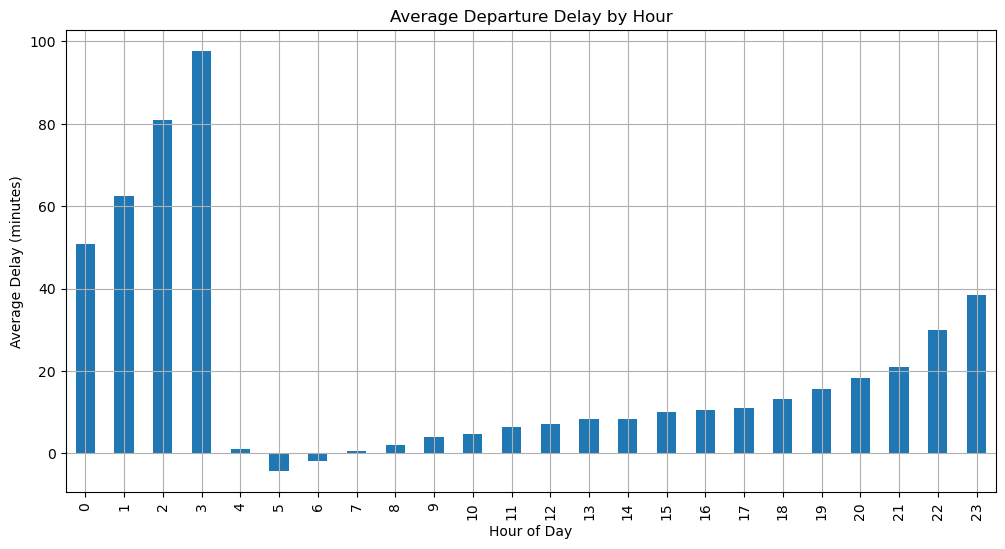

In [31]:
#Hourly Delay Analysis
# Find which hours of the day have the most delays
hourly_avg = df.groupby('DEP_HOUR')['DEP_DELAY'].mean()
hourly_avg.plot(kind='bar', figsize=(12, 6), title='Average Departure Delay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()



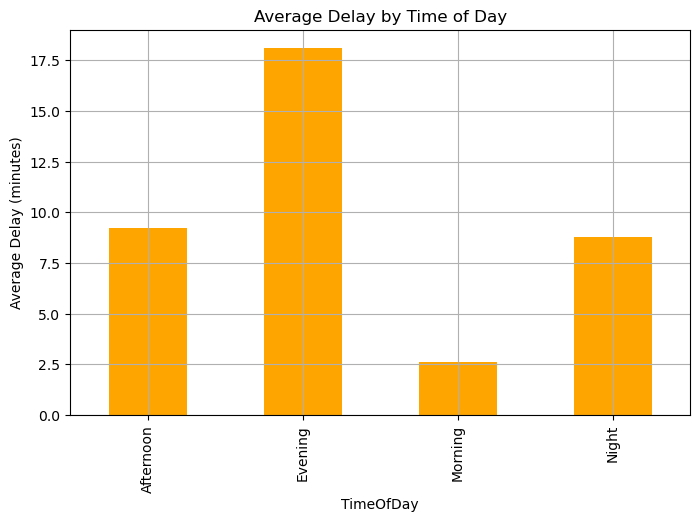

In [32]:
# Delay Patterns by Time of Day
#Morning vs Afternoon vs Evening flights — which have more delays?
tod_avg = df.groupby('TimeOfDay')['DEP_DELAY'].mean()
tod_avg.plot(kind='bar', figsize=(8, 5), color='orange', title='Average Delay by Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()


In [6]:
#Find all flights with a departure delay greater than 60 minutes
for doc in collection.find({ "DEP_DELAY": { "$gt": 60 } }).limit(5):
    print(doc)


{'_id': ObjectId('67f76d169f460e1ff684d18d'), 'FL_DATE': '2006-01-02', 'DEP_DELAY': 167, 'ARR_DELAY': 216, 'AIR_TIME': 343, 'DISTANCE': 2475, 'DEP_TIME': 11.783334, 'ARR_TIME': 15.766666}
{'_id': ObjectId('67f76d169f460e1ff684d1af'), 'FL_DATE': '2006-01-09', 'DEP_DELAY': 143, 'ARR_DELAY': 127, 'AIR_TIME': 276, 'DISTANCE': 2475, 'DEP_TIME': 11.883333, 'ARR_TIME': 19.866667}
{'_id': ObjectId('67f76d169f460e1ff684d1b8'), 'FL_DATE': '2006-01-18', 'DEP_DELAY': 69, 'ARR_DELAY': 44, 'AIR_TIME': 270, 'DISTANCE': 2475, 'DEP_TIME': 10.65, 'ARR_TIME': 18.483334}
{'_id': ObjectId('67f76d169f460e1ff684d1f3'), 'FL_DATE': '2006-01-15', 'DEP_DELAY': 105, 'ARR_DELAY': 83, 'AIR_TIME': 267, 'DISTANCE': 2475, 'DEP_TIME': 14.25, 'ARR_TIME': 22.2}
{'_id': ObjectId('67f76d169f460e1ff684d22f'), 'FL_DATE': '2006-01-13', 'DEP_DELAY': 67, 'ARR_DELAY': 63, 'AIR_TIME': 405, 'DISTANCE': 3711, 'DEP_TIME': 19.033333, 'ARR_TIME': 5.983333}


In [7]:
#Find all long-distance flights (more than 3000 miles)
for doc in collection.find({ "DISTANCE": { "$gt": 3000 } }).limit(5):
    print(doc)

{'_id': ObjectId('67f76d169f460e1ff684d204'), 'FL_DATE': '2006-01-01', 'DEP_DELAY': -4, 'ARR_DELAY': 26, 'AIR_TIME': 516, 'DISTANCE': 3784, 'DEP_TIME': 10.016666, 'ARR_TIME': 15.116667}
{'_id': ObjectId('67f76d169f460e1ff684d205'), 'FL_DATE': '2006-01-02', 'DEP_DELAY': 1, 'ARR_DELAY': 25, 'AIR_TIME': 505, 'DISTANCE': 3784, 'DEP_TIME': 10.1, 'ARR_TIME': 15.1}
{'_id': ObjectId('67f76d169f460e1ff684d206'), 'FL_DATE': '2006-01-03', 'DEP_DELAY': -2, 'ARR_DELAY': 13, 'AIR_TIME': 503, 'DISTANCE': 3784, 'DEP_TIME': 10.05, 'ARR_TIME': 14.9}
{'_id': ObjectId('67f76d169f460e1ff684d207'), 'FL_DATE': '2006-01-04', 'DEP_DELAY': 0, 'ARR_DELAY': 21, 'AIR_TIME': 510, 'DISTANCE': 3784, 'DEP_TIME': 10.083333, 'ARR_TIME': 15.033334}
{'_id': ObjectId('67f76d169f460e1ff684d208'), 'FL_DATE': '2006-01-05', 'DEP_DELAY': -3, 'ARR_DELAY': 4, 'AIR_TIME': 498, 'DISTANCE': 3784, 'DEP_TIME': 10.033334, 'ARR_TIME': 14.75}


In [8]:
#Find flights with arrival delay > 30 min AND air time < 60 min
query = {
    "ARR_DELAY": { "$gt": 30 },
    "AIR_TIME": { "$lt": 60 }
}
for doc in collection.find(query).limit(5):
    print(doc)


{'_id': ObjectId('67f76d169f460e1ff684de5e'), 'FL_DATE': '2006-01-03', 'DEP_DELAY': 87, 'ARR_DELAY': 88, 'AIR_TIME': 42, 'DISTANCE': 237, 'DEP_TIME': 18.2, 'ARR_TIME': 19.216667}
{'_id': ObjectId('67f76d169f460e1ff684de5f'), 'FL_DATE': '2006-01-04', 'DEP_DELAY': 53, 'ARR_DELAY': 49, 'AIR_TIME': 38, 'DISTANCE': 237, 'DEP_TIME': 17.633333, 'ARR_TIME': 18.566668}
{'_id': ObjectId('67f76d169f460e1ff684de64'), 'FL_DATE': '2006-01-09', 'DEP_DELAY': 29, 'ARR_DELAY': 35, 'AIR_TIME': 50, 'DISTANCE': 237, 'DEP_TIME': 17.233334, 'ARR_TIME': 18.333334}
{'_id': ObjectId('67f76d169f460e1ff684de6b'), 'FL_DATE': '2006-01-16', 'DEP_DELAY': 19, 'ARR_DELAY': 49, 'AIR_TIME': 35, 'DISTANCE': 237, 'DEP_TIME': 17.066668, 'ARR_TIME': 18.566668}
{'_id': ObjectId('67f76d169f460e1ff684de6c'), 'FL_DATE': '2006-01-17', 'DEP_DELAY': 49, 'ARR_DELAY': 59, 'AIR_TIME': 42, 'DISTANCE': 237, 'DEP_TIME': 17.566668, 'ARR_TIME': 18.733334}
